# Support Vector Machines-1

#### Q1. What is the mathematical formula for a linear SVM?

For a binary classification problem with two classes (-1 and 1):
**f(x)=sign(w⋅x+b)**

Where:
* f(x) is the predicted class label.
* w is the weight vector.
* x is the feature vector.
* b is the bias term.

#### Q2. What is the objective function of a linear SVM?

Q2. The objective function of a linear SVM is to find the hyperplane that maximizes the margin between the classes while minimizing the classification error. Mathematically, it can be formulated as: **min(w,b) 1/2||w||^2**

subject to: yi(w * xi +b)≥1 for all data points (xi,yi).

#### Q3. What is the kernel trick in SVM?

The kernel trick in SVM is a technique to transform the data into a higher-dimensional space using a kernel function (e.g., polynomial, radial basis function) so that it becomes linearly separable. This allows SVM to handle complex decision boundaries in the original feature space.

####  Q4. What is the role of support vectors in SVM Explain with example

Support vectors are the data points that lie closest to the decision boundary (hyperplane) and play a crucial role in defining the margin. They are the points that have the potential to influence the position and orientation of the hyperplane. In essence, support vectors are the "support" for the decision boundary. For example, in a 2D dataset, support vectors are the data points that lie on the margins or are misclassified.

#### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

* Hyperplane: A hyperplane is a decision boundary that separates data points from different classes. In a 2D space, it's a line; in a 3D space, it's a plane. In higher dimensions, it's a hyperplane.
* Marginal Plane: The marginal plane is the hyperplane that lies equidistant between the two classes and touches the support vectors. It's an important concept in SVM for defining the margin.
* Soft Margin and Hard Margin: In a hard-margin SVM, the margin is maximized, and data points should be fully separated. However, this might not work well for noisy or overlapping data. In a soft-margin SVM, some misclassification is allowed to find a balance between maximizing the margin and minimizing errors.

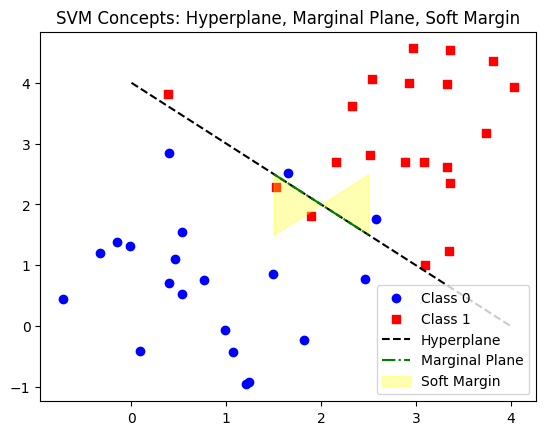

In [1]:
import numpy as ny
import matplotlib.pyplot as pt
# Generate random data points
ny.random.seed(42)
b = ny.random.randn(20, 2) + [1, 1]
r = ny.random.randn(20, 2) + [3, 3]
# Plot the dataset
pt.scatter(b[:, 0], b[:, 1], color='blue', marker='o', label='Class 0')
pt.scatter(r[:, 0], r[:, 1], color='red', marker='s', label='Class 1')
# Hyperplane
pt.plot([0, 4], [4, 0], color='black', linestyle='--', label='Hyperplane')
# Marginal Plane
pt.plot([1.5, 2.5], [2.5, 1.5], color='green', linestyle='-.', label='Marginal Plane')
# Soft Margin
pt.fill_between([1.5, 2.5], [2.5, 1.5], [1.5, 2.5], color='yellow', alpha=0.3, label='Soft Margin')
pt.title('SVM Concepts: Hyperplane, Marginal Plane, Soft Margin')
pt.legend()
pt.show()

#### Q6. SVM Implementation through Iris dataset.
* Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
* Train a linear SVM classifier on the training set and predict the labels for the testing setl
* Compute the accuracy of the model on the testing setl
* Plot the decision boundaries of the trained model using two of the featuresl
* Try different values of the regularisation parameter C and see how it affects the performance of the model.

**Bonus task**: *Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.*

Accuracy with C=0.1 is 0.7735849056603774


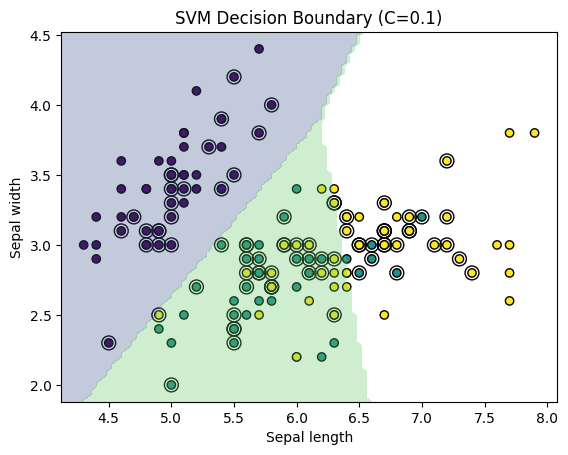

Accuracy with C=1 is 0.7924528301886793


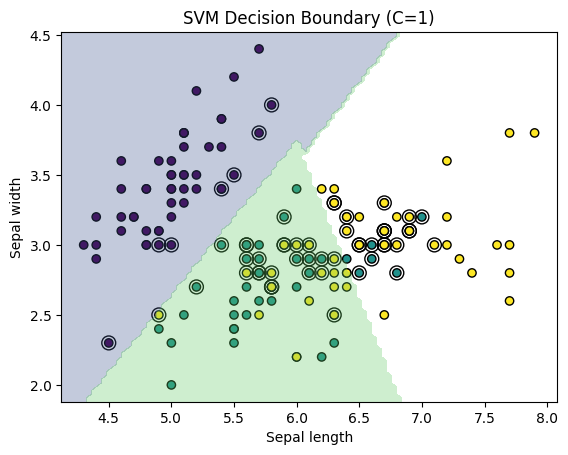

Accuracy with C=10 is 0.7547169811320755


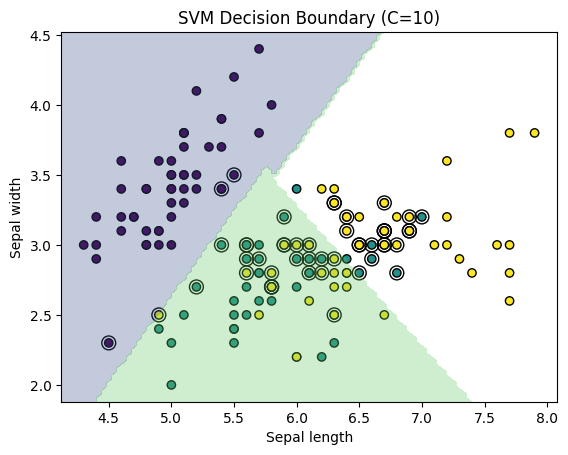

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pt
import numpy as ny

# Loding the Dataset
ds = load_iris()

# Splitting the datasets
x = ds.data[:, :2]
y = ds.target
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.35, stratify = y, random_state = 15)

# Training the model for different values of C
C_values = [0.1, 1,10]  # Different values of C
for c in C_values:
    model = SVC(C=c, kernel = 'linear')
    model.fit(x_train,y_train)
    # Prediction
    y_pred = model.predict(x_test)
    # Evaluation
    acc = accuracy_score(y_test,y_pred)
    print(f"Accuracy with C={c} is {acc}")
    # Ploting points
    pt.figure()
    pt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    pt.xlabel('Sepal length')
    pt.ylabel('Sepal width')
    pt.title(f"SVM Decision Boundary (C={c})")
    # Plot Support Vectors
    pt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,facecolors='none', edgecolors='k')   
    # Create a meshgrid for plotting
    ax = pt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    X,Y = ny.meshgrid(ny.linspace(xlim[0],xlim[1],100),ny.linspace(ylim[0],ylim[1],100))
    # Make predictions on the meshgrid
    z = model.predict(ny.c_[X.ravel(),Y.ravel()])
    z = z.reshape(X.shape)

    # Plot Decision Boundaries
    pt.contourf(X,Y,z,levels=[-1,0,1], alpha=0.3)
    pt.title(f"SVM Decision Boundary (C={c})")
    pt.show()